In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# rescale image
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [ ]:

model = Sequential([
    Conv2D(2, (5,5), input_shape=(28, 28, 1), padding="valid", activation="relu"),    
    MaxPooling2D(),
    Conv2D(4, (3,3), padding="valid", activation="sigmoid"),
    MaxPooling2D(),    
    Flatten(),
    Dense(10, activation="sigmoid")
    
    
    
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
model.fit(X_train_scaled, y_train, epochs=2, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/2


c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5257 - sparse_categorical_accuracy: 0.5200 - val_loss: 0.3816 - val_sparse_categorical_accuracy: 0.8969
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3646 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.2616 - val_sparse_categorical_accuracy: 0.9266


In [9]:
print(model.layers[0].kernel)

<Variable path=sequential_3/conv2d_6/kernel, shape=(5, 5, 1, 2), dtype=float32, value=[[[[-0.26286373  0.6197032 ]]

  [[-0.31200606  0.27746797]]

  [[ 0.40715525  0.54836464]]

  [[-0.1350948   0.59314007]]

  [[-0.37791812  0.9930143 ]]]


 [[[-0.29769823 -0.01363629]]

  [[ 0.23578475  0.25380003]]

  [[ 0.79979235  0.34868366]]

  [[ 0.3216341   0.22939481]]

  [[-0.30323055  0.5080639 ]]]


 [[[-0.1160333  -0.19660622]]

  [[ 0.3681741  -0.36541513]]

  [[ 0.97425     0.15941311]]

  [[ 0.6944971   0.12979129]]

  [[ 0.13786417 -0.34510118]]]


 [[[ 0.87968296 -0.7463578 ]]

  [[ 0.8727812  -0.52957255]]

  [[ 1.0837554  -0.90574116]]

  [[ 0.6835511  -0.73973346]]

  [[ 0.44438294 -0.84515023]]]


 [[[ 0.94186383 -0.2650812 ]]

  [[ 0.8675171  -0.88834494]]

  [[ 0.44466153 -0.87583   ]]

  [[ 0.5018864  -0.6409876 ]]

  [[ 0.42056355 -0.37260962]]]]>


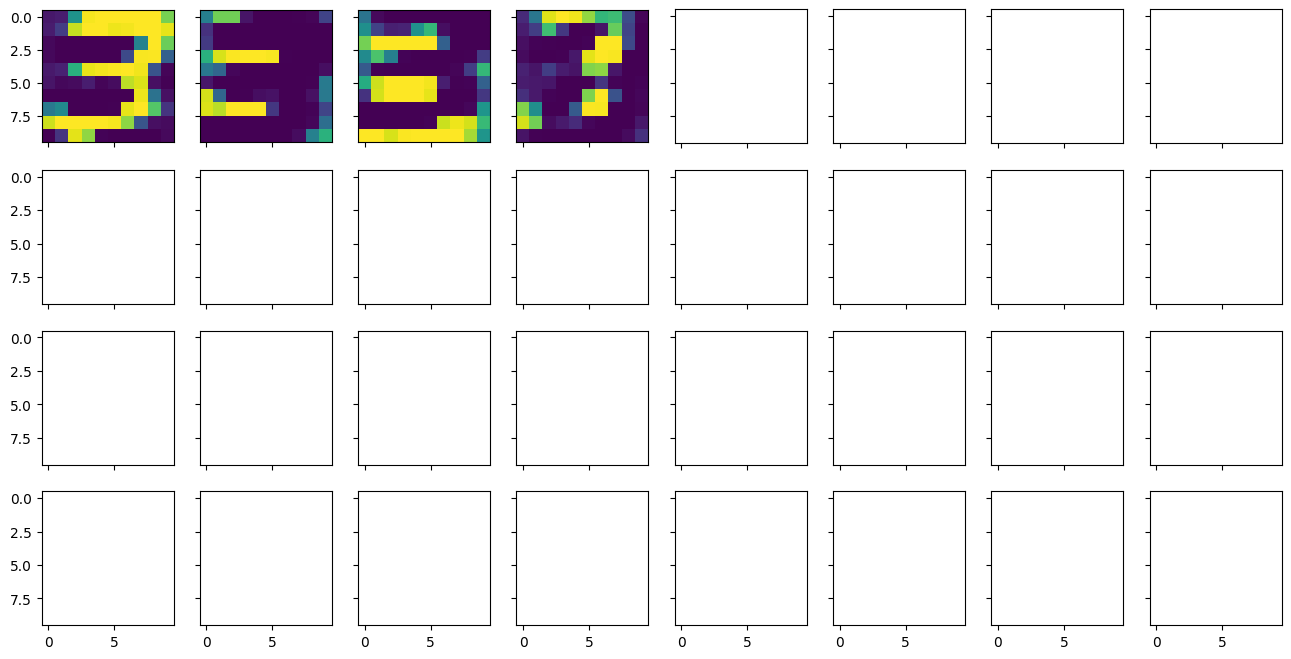

In [12]:
# Extract output from each layer
extractor = tf.keras.Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(X_train_scaled[7], 0))
# Show the 32 feature maps from the first layer
l0_features = features[2].numpy()[0]
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 4):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])
plt.show()